In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# function to check if the game is over
def is_terminal(state):
    return all(h == 0 for h in state)

In [8]:
# function to get all moves possible from a state
def get_moves(state):
    moves = []
    for i, heap in enumerate(state):
        if heap > 0:
            for remove in range(1, heap + 1):
                new_state = list(state)
                new_state[i] -= remove
                moves.append((state, tuple(new_state)))
    return moves

In [9]:
#  Minimax
def minimax(state, maximizing_player=True, graph=None, parent=None, best_path=None):
    if graph is None:
        graph = nx.DiGraph()
    if best_path is None:
        best_path = {}

    node_label = str(state)
    if parent is not None:
        graph.add_edge(str(parent), node_label)

    if is_terminal(state):
        value = -1 if maximizing_player else 1
        graph.nodes[node_label]["label"] = f"{state}\nVal={value}"
        return value, graph, best_path

    # MAX player turn
    if maximizing_player:
        value = float('-inf')
        best_child = None
        for move in get_moves(state):
            child_val, graph, best_path = minimax(move[1], False, graph, state, best_path)
            if child_val > value:
                value = child_val
                best_child = move[1]
        graph.nodes[node_label]["label"] = f"{state}\nMAX={value}"
        if best_child:
            best_path[state] = best_child
        return value, graph, best_path

    #Min player turn
    else:
        value = float('inf')
        best_child = None
        for move in get_moves(state):
            child_val, graph, best_path = minimax(move[1], True, graph, state, best_path)
            if child_val < value:
                value = child_val
                best_child = move[1]
        graph.nodes[node_label]["label"] = f"{state}\nMIN={value}"
        if best_child:
            best_path[state] = best_child
        return value, graph, best_path

In [10]:
# Alpha-Beta Pruning
def alpha_beta(state, alpha=float('-inf'), beta=float('inf'), maximizing_player=True, graph=None, parent=None, best_path=None):
    if graph is None:
        graph = nx.DiGraph()
    if best_path is None:
        best_path = {}

    node_label = str(state)
    if parent is not None:
        graph.add_edge(str(parent), node_label)

    if is_terminal(state):
        value = -1 if maximizing_player else 1
        graph.nodes[node_label]["label"] = f"{state}\nVal={value}"
        return value, graph, best_path

    if maximizing_player:
        value = float('-inf')
        best_child = None
        for move in get_moves(state):
            child_val, graph, best_path = alpha_beta(move[1], alpha, beta, False, graph, state, best_path)
            if child_val > value:
                value = child_val
                best_child = move[1]
            alpha = max(alpha, value)
            if beta <= alpha:  # pruning
                break
        graph.nodes[node_label]["label"] = f"{state}\nMAX={value}"
        if best_child:
            best_path[state] = best_child
        return value, graph, best_path
    else:
        value = float('inf')
        best_child = None
        for move in get_moves(state):
            child_val, graph, best_path = alpha_beta(move[1], alpha, beta, True, graph, state, best_path)
            if child_val < value:
                value = child_val
                best_child = move[1]
            beta = min(beta, value)
            if beta <= alpha:  # pruning
                break
        graph.nodes[node_label]["label"] = f"{state}\nMIN={value}"
        if best_child:
            best_path[state] = best_child
        return value, graph, best_path



In [11]:
# Graph
def draw_tree(graph, best_path, root, title):
    pos = nx.spring_layout(graph, seed=42)
    labels = nx.get_node_attributes(graph, "label")

    # Best path edges
    path_edges = []
    current = root
    while current in best_path:
        nxt = best_path[current]
        path_edges.append((str(current), str(nxt)))
        current = nxt

    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=False, node_size=2000, node_color="lightblue", edge_color="gray")
    nx.draw_networkx_labels(graph, pos, labels, font_size=8)
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color="red", width=2)
    plt.title(title)
    plt.show()

In [12]:

initial_state = (1, 2, 3)

# Minimax (no pruning)
start_time = time.time()
val1, graph1, best_path1 = minimax(initial_state, True)
time_minimax = time.time() - start_time
nodes_minimax = len(graph1.nodes)

In [13]:
# Alpha-Beta (with pruning)
start_time = time.time()
val2, graph2, best_path2 = alpha_beta(initial_state, float('-inf'), float('inf'), True)
time_alpha_beta = time.time() - start_time
nodes_alpha_beta = len(graph2.nodes)

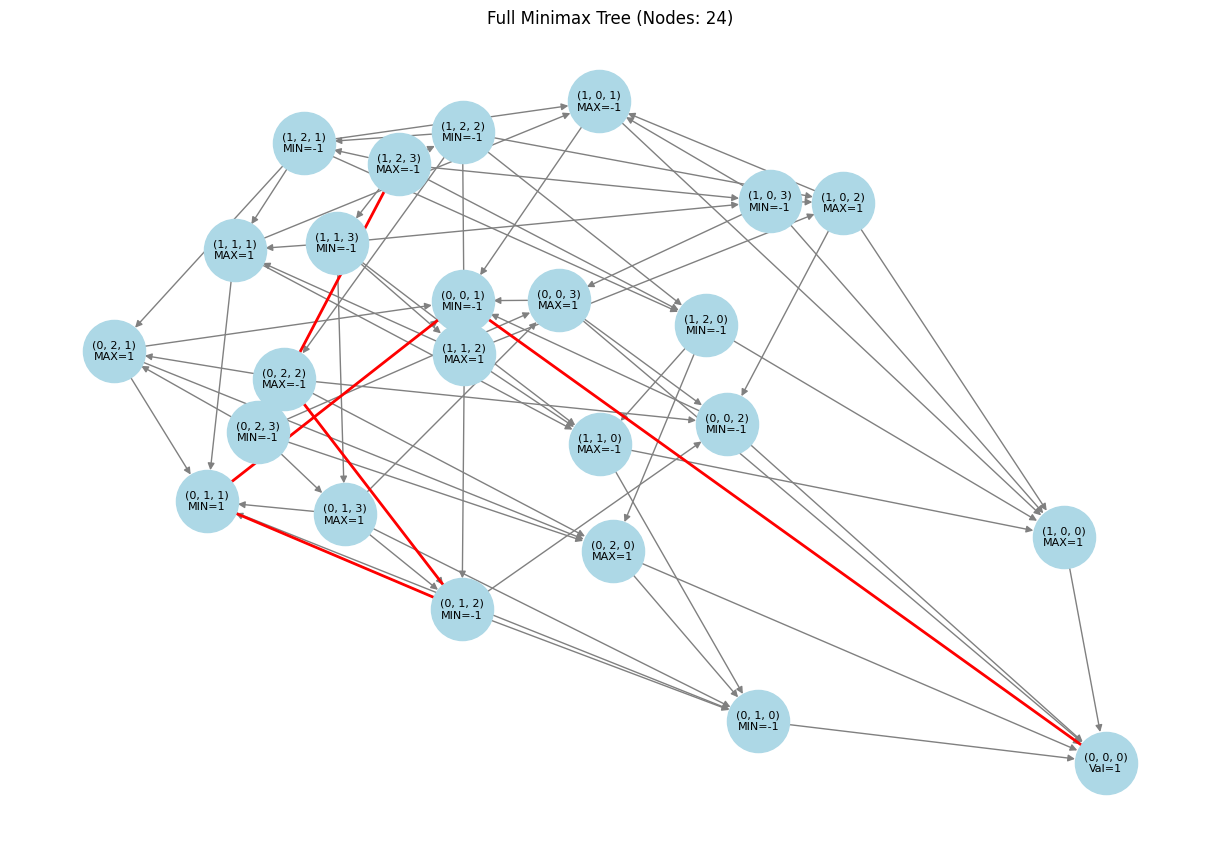

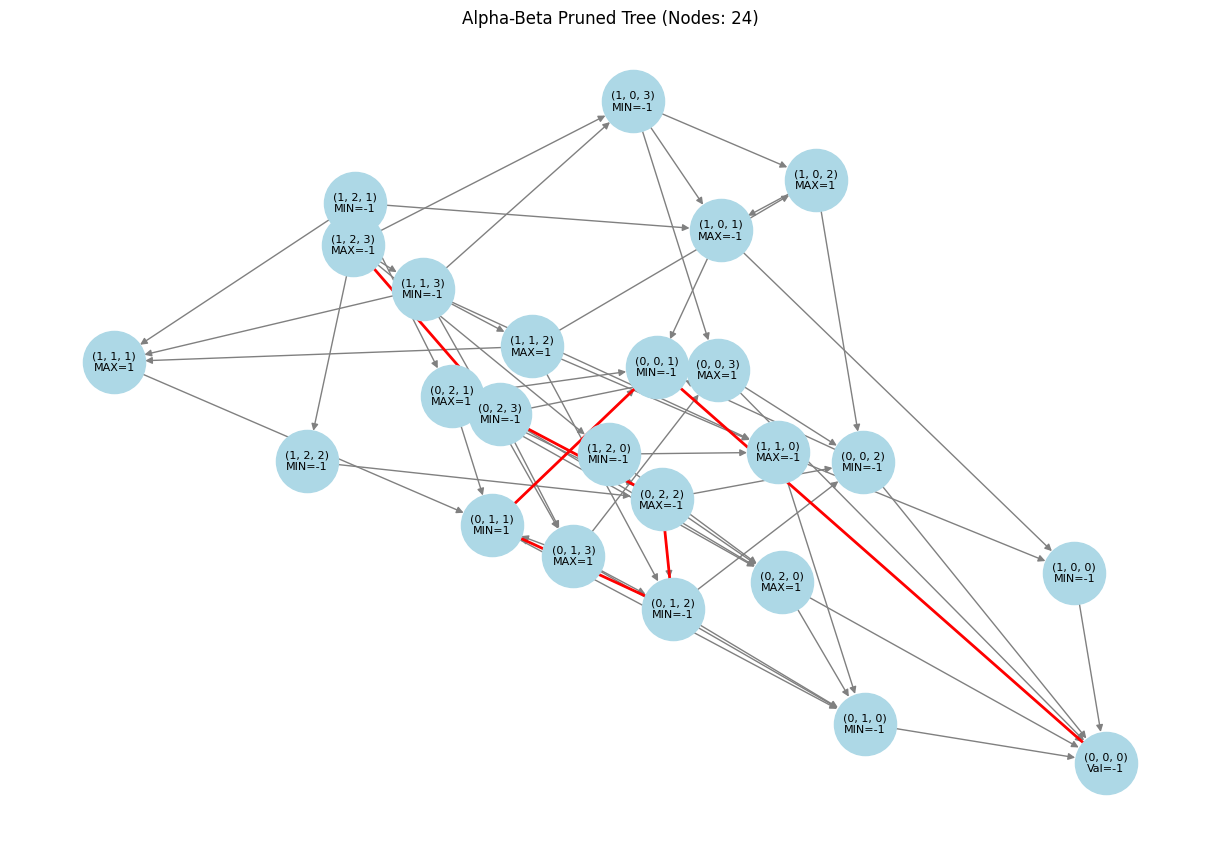

In [14]:
# Draw graph
draw_tree(graph1, best_path1, initial_state, f"Full Minimax Tree (Nodes: {nodes_minimax})")
draw_tree(graph2, best_path2, initial_state, f"Alpha-Beta Pruned Tree (Nodes: {nodes_alpha_beta})")

In [16]:
# Print comparison
print("\n--- Comparison ---")
print(f"Initial state: {initial_state}")
print(f"Minimax Value: {val1}, Nodes: {nodes_minimax}, Time: {time_minimax:.6f} sec")
print(f"Alpha-Beta Value: {val2}, Nodes: {nodes_alpha_beta}, Time: {time_alpha_beta:.6f} sec")


--- Comparison ---
Initial state: (1, 2, 3)
Minimax Value: -1, Nodes: 24, Time: 0.002925 sec
Alpha-Beta Value: -1, Nodes: 24, Time: 0.002401 sec


In [22]:
best_path2 = {k: v for k, v in reversed(list(best_path2.items()))}
print("Best path (state → next optimal state):")

for k, v in best_path2.items():
        print(f"  {k} → {v}")

Best path (state → next optimal state):
  (1, 2, 3) → (0, 2, 3)
  (1, 2, 0) → (1, 1, 0)
  (1, 2, 1) → (1, 0, 1)
  (1, 2, 2) → (0, 2, 2)
  (1, 1, 3) → (1, 1, 0)
  (1, 1, 2) → (1, 1, 0)
  (1, 1, 0) → (0, 1, 0)
  (1, 1, 1) → (0, 1, 1)
  (1, 0, 3) → (1, 0, 1)
  (1, 0, 2) → (1, 0, 1)
  (1, 0, 1) → (0, 0, 1)
  (1, 0, 0) → (0, 0, 0)
  (0, 2, 3) → (0, 2, 2)
  (0, 2, 2) → (0, 1, 2)
  (0, 2, 0) → (0, 0, 0)
  (0, 2, 1) → (0, 1, 1)
  (0, 1, 3) → (0, 1, 1)
  (0, 1, 2) → (0, 1, 1)
  (0, 1, 1) → (0, 0, 1)
  (0, 1, 0) → (0, 0, 0)
  (0, 0, 3) → (0, 0, 0)
  (0, 0, 2) → (0, 0, 0)
  (0, 0, 1) → (0, 0, 0)
